In [10]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv("/Users/sarahSTACS/DSA4264-Detoxify/model-2/final_topic_df.csv")
column_names = df.columns
print(column_names)

Index(['text', 'timestamp', 'username', 'link', 'link_id', 'parent_id', 'id',
       'subreddit_id', 'moderation', 'year', 'word_count', 'Sensitive Group',
       'Classification', 'clean_text', 'custom_topic', 'Topic_Words',
       'Final Topic', 'Final Topic Name'],
      dtype='object')


In [5]:
unique_values = df["Classification"].unique()
print("Unique values in the 'Classification' column:", unique_values)

Unique values in the 'Classification' column: ['Toxic 2' 'Toxic 1' 'Hate 1' 'Hate 2' 'Toxic 3' 'Hate 3']


In [23]:
# Filter rows with non-null 'Final Topic Name'
df_filtered = df[df["Final Topic Name"].notnull()]

# Group by 'year' and 'Final Topic Name' and count the total number of classification rows
df_summary = (
    df_filtered.groupby(["year", "Final Topic Name"])
    .size()
    .reset_index(name="Classification Count")
)

# Displaying the summary
print(df_summary)

    year Final Topic Name  Classification Count
0   2020       Body Image                    83
1   2020         COVID-19                   268
2   2020           Crimes                   393
3   2020        Education                    85
4   2020           Gender                   334
5   2020     Generational                   202
6   2020       Government                   301
7   2020          Housing                    97
8   2020           LGBTQ+                   154
9   2020           Racism                  2093
10  2020         Religion                   335
11  2020   Transportation                   140
12  2020             Work                   157
13  2021       Body Image                    88
14  2021         COVID-19                   724
15  2021           Crimes                   566
16  2021        Education                   134
17  2021           Gender                   428
18  2021     Generational                   216
19  2021       Government               

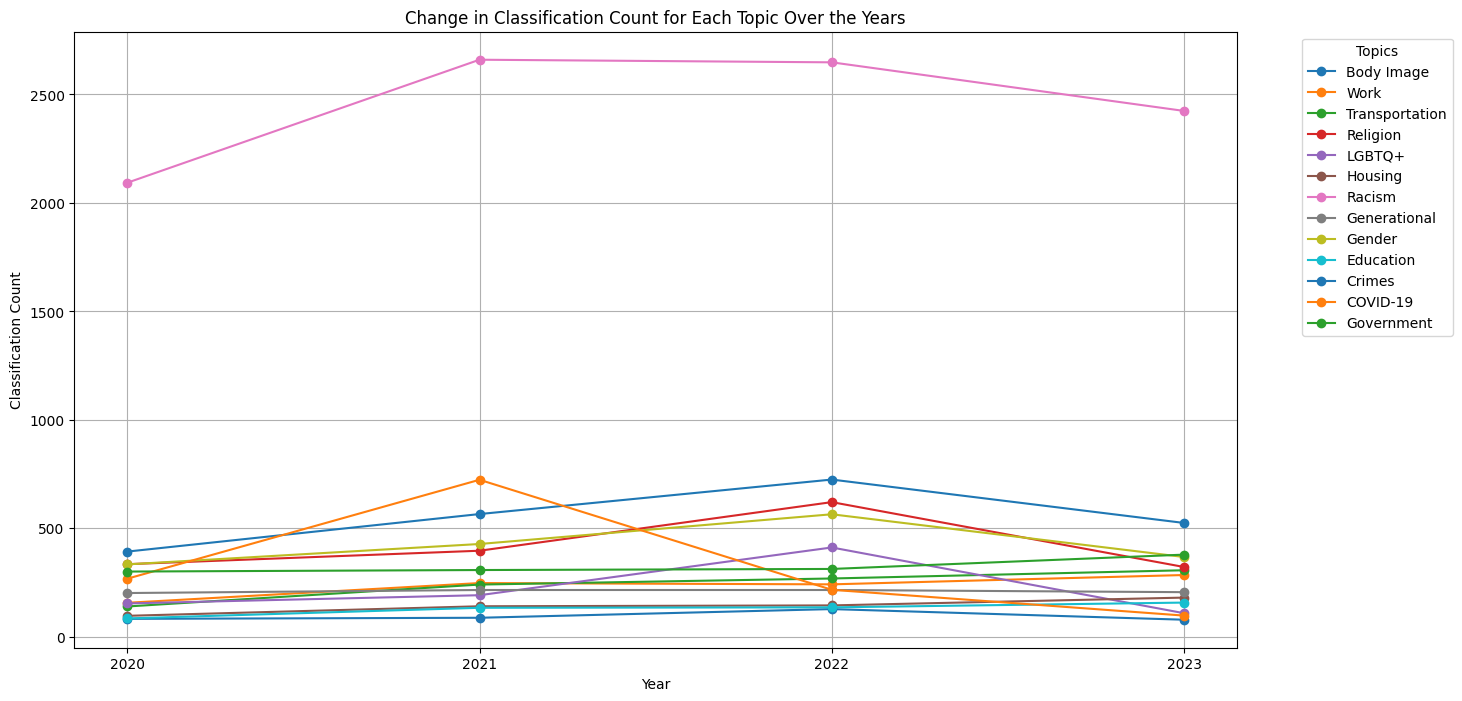

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_summary is already created as per your earlier code

# Plotting
df_summary["year"] = pd.to_numeric(df_summary["year"])
df_summary = df_summary.sort_values(by=["year"])

plt.figure(figsize=(15, 8))
for topic in df_summary["Final Topic Name"].unique():
    topic_data = df_summary[df_summary["Final Topic Name"] == topic]
    plt.plot(
        topic_data["year"], topic_data["Classification Count"], marker="o", label=topic
    )

plt.title("Change in Classification Count for Each Topic Over the Years")
plt.xlabel("Year")
plt.ylabel("Classification Count")
plt.xticks(sorted(df_summary["year"].unique()))
plt.legend(title="Topics", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(visible=True)

# Show plot
plt.show()

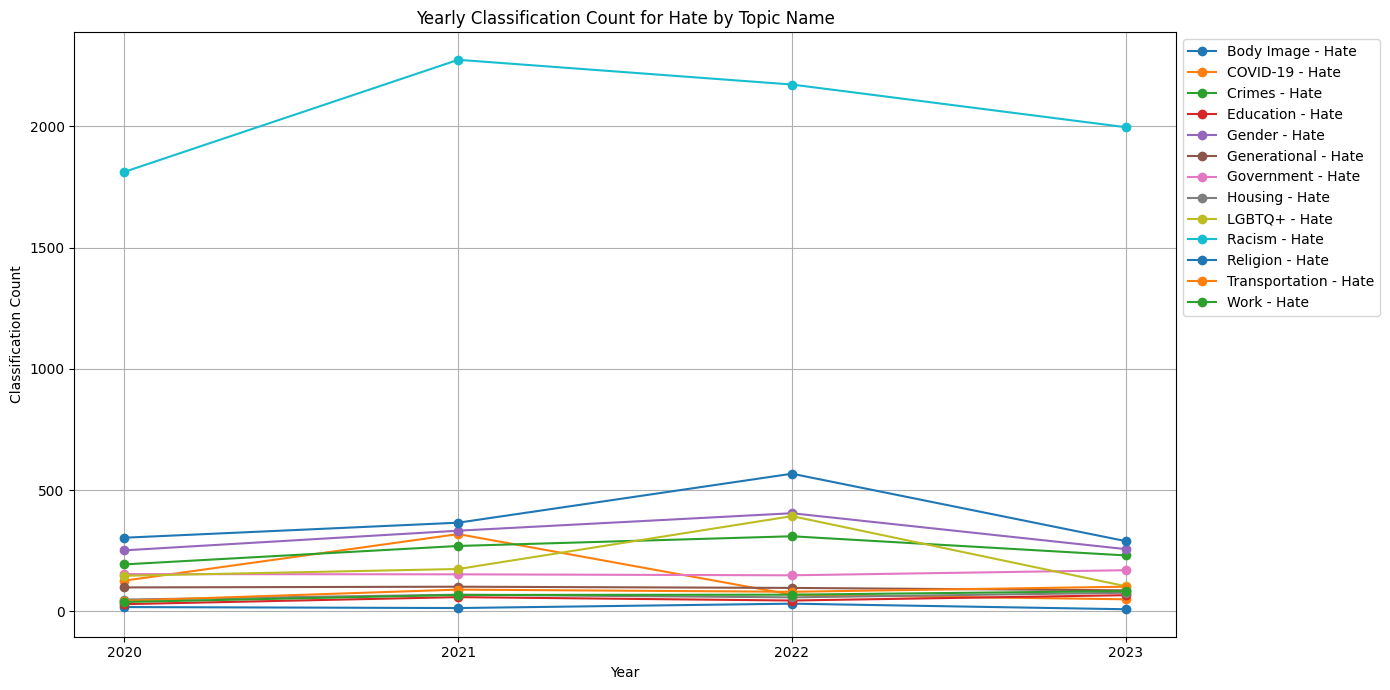

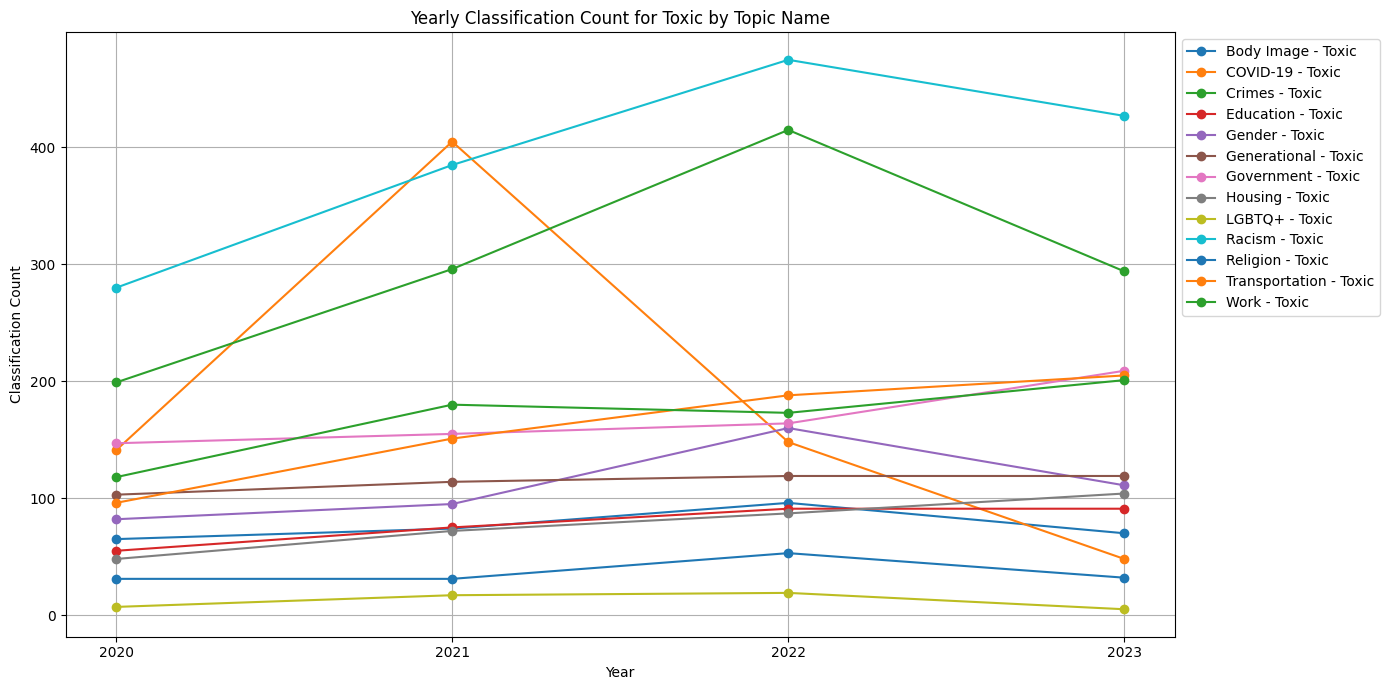

In [27]:
# Assuming the DataFrame 'df' is already defined and the mapping has been applied
classification_map = {
    "Toxic 1": "Toxic",
    "Toxic 2": "Toxic",
    "Toxic 3": "Toxic",
    "Hate 1": "Hate",
    "Hate 2": "Hate",
    "Hate 3": "Hate",
}

# Apply the mapping to create a new 'General Classification' column
df["General Classification"] = df["Classification"].map(classification_map)

# Filter out rows with non-null 'Final Topic Name'
df_filtered = df[df["Final Topic Name"].notnull()]

# Group by 'year', 'Final Topic Name', and 'General Classification' and count the number of occurrences
df_summary = (
    df_filtered.groupby(["year", "Final Topic Name", "General Classification"])
    .size()
    .reset_index(name="Classification Count")
)

# Get the range of years for setting x-ticks
years = sorted(df_summary["year"].unique())

# Plotting the classification count for 'Hate'
plt.figure(figsize=(14, 7))
subset_hate = df_summary[df_summary["General Classification"] == "Hate"]
for topic_name in subset_hate["Final Topic Name"].unique():
    topic_subset = subset_hate[subset_hate["Final Topic Name"] == topic_name]
    if not topic_subset.empty:
        plt.plot(
            topic_subset["year"],
            topic_subset["Classification Count"],
            marker="o",
            label=f"{topic_name} - Hate",
        )

plt.title("Yearly Classification Count for Hate by Topic Name")
plt.xlabel("Year")
plt.ylabel("Classification Count")
plt.xticks(years)  # Set x-ticks to be whole years only
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the classification count for 'Toxic'
plt.figure(figsize=(14, 7))
subset_toxic = df_summary[df_summary["General Classification"] == "Toxic"]
for topic_name in subset_toxic["Final Topic Name"].unique():
    topic_subset = subset_toxic[subset_toxic["Final Topic Name"] == topic_name]
    if not topic_subset.empty:
        plt.plot(
            topic_subset["year"],
            topic_subset["Classification Count"],
            marker="o",
            label=f"{topic_name} - Toxic",
        )

plt.title("Yearly Classification Count for Toxic by Topic Name")
plt.xlabel("Year")
plt.ylabel("Classification Count")
plt.xticks(years)  # Set x-ticks to be whole years only
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()